# Phase 3: Cross-Cancer Therapy Recommendation System

**Development of a Cross Cancer Recommendation System**


- Objective of the System:
 - In the next phase, you will develop a Cross Cancer Recommendation System. This system aims to recommend appropriate therapies based on patients' genetic information, regardless of whether they have the same type of cancer or not.

- Utilizing Existing Data:
 - You already have a dataset that includes information about patients with various types of cancer and their respective therapies. This data will serve as the foundation for training the recommendation system.

- Patient Genetic Information:
 - The dataset contains genetic information for each patient. This data is crucial, as it will be used to analyze and understand how different genetic profiles respond to various therapies.

- Therapy Recommendations:
 - The system will recommend therapies to new patients based solely on their genetic information. This approach allows for personalized treatment options that may not be limited to their specific cancer type.

- Independent of Cancer Type:
 - The recommendation process will not consider whether the new patient has the same type of cancer as those in the dataset. This enables a broader application of therapeutic options based on genetic similarities, potentially improving treatment efficacy.

- Goal of the System:
 - The ultimate goal is to create a dynamic and effective recommendation system that can provide tailored therapy suggestions, enhancing patient outcomes and expanding treatment possibilities across different cancer types.

## Data Preparation and Preprocessing (same as phase 1)

### 1. Load the Dataset
 - Load the dataset from the specified CSV file using pandas. Make sure to handle the encoding correctly.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = r"/content/drive/MyDrive/Colab Notebooks/2025Summer/Convoloo/Studiendaten für Similarity analyse neu.xlsx"

import pandas as pd

df_raw = pd.read_excel(file_path)
df_raw.head()

Mounted at /content/drive


,Eingangsbuchnummer,Zugehörigkeit zu Studie,Geschlecht,Alter des Patienten bei Diagnose,Geburtsdatum,OP Datum,Progress,Progress Datum,Nachsorge Datum,PFS,...,Tumormarker 1,Tumormarker 2,neoadjuvante Chemotherapie,Wirkstoffschema neoadjuvante Therapie,Therapieerfolg neoadjuvante Therapie,adjuvante Chemotherapie,Wirkstoffschema adjuvante Therapie,Vorerkrankungen,Adjuvante Therapie des Primärtumors oder vorhergeganener Metastase,Wirkstoffschema der Adjuvanten Therapie des Primärtumors oder vorhergegangener Metastase
0,3958,SpheroPCT,weiblich,65,1940-07-28 00:00:00,2006-01-25 00:00:00,nein,kein Progress,2016-08-25 00:00:00,127,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
1,3990,SpheroPCT,männlich,71,1934-08-05 00:00:00,2006-04-28 00:00:00,nein,kein Progress,2015-11-28 00:00:00,115,...,CEA im Normbereich,CA19-9 pathologisch,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
2,4001,SpheroPCT,männlich,70,1935-05-05 00:00:00,2006-05-22 00:00:00,nein,kein Progress,2013-01-22 00:00:00,80,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
3,3992,SpheroPCT,männlich,64,1942-04-11 00:00:00,2006-05-08 00:00:00,nein,kein Progress,2016-06-08 00:00:00,121,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,nein,entfällt,entfällt
4,4028,SpheroPCT,männlich,62,1944-07-13 00:00:00,2006-09-19 00:00:00,nein,kein Progress,19-Oct-2008,25,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt


In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 44 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Eingangsbuchnummer                                                                        673 non-null    object
 1   Zugehörigkeit zu Studie                                                                   673 non-null    object
 2   Geschlecht                                                                                673 non-null    object
 3   Alter des Patienten bei Diagnose                                                          673 non-null    object
 4   Geburtsdatum                                                                              673 non-null    object
 5   OP Datum                                                        

### 2. Translate all the column names in English

In [3]:
column_translation = {
    "Eingangsbuchnummer": "Entry Number",
    "Zugehörigkeit zu Studie": "Study Affiliation",
    "Geschlecht": "Gender",
    "Alter des Patienten bei Diagnose": "Age at Diagnosis",
    "Geburtsdatum": "Birth Date",
    "OP Datum": "Surgery Date",
    "Progress": "Progress",
    "Progress Datum": "Progress Date",
    "Nachsorge Datum": "Follow-up Date",
    "PFS": "Progression-Free Survival",
    "early Progress 1=nein; 2= ja": "Early Progress",
    "Vitalstatus": "Vital Status",
    "Tumorbedingt verstorben": "Tumor-related Death",
    "Todesdatum": "Date of Death",
    "OS": "Overall Survival (OS)",
    "BMI": "Body Mass Index (BMI)",
    "Hauptdiagnose PT": "Primary Diagnosis PT",
    "Sample type": "Sample Type",
    "Sample site": "Sample Site",
    "Histologie": "Histology",
    "T-Status": "T Status",
    "N-Status": "N Status",
    "M-Status": "M Status",
    "V-Status": "V Status",
    "L-Status": "L Status",
    "Pn-Status": "Pn Status",
    "Grading ": "Grading",
    "R-Status ": "R Status",
    "Tumorseite": "Tumor Side",
    "Tumor/Metastasen Durchmesser": "Tumor/Metastasis Diameter",
    "synchrone oder metachrone Metastasierung": "Synchronous or Metachronous Metastasis",
    "Anzahl Metastasen intrahepatisch": "Number of Intrahepatic Metastases",
    "Anzahl Metastasen extrahepatisch": "Number of Extrahepatic Metastases",
    "Ort metastasen extrahepatisch": "Site of Extrahepatic Metastases",
    "Tumormarker 1 ": "Tumor Marker 1",
    "Tumormarker 2": "Tumor Marker 2",
    "neoadjuvante Chemotherapie": "Neoadjuvant Chemotherapy",
    "Wirkstoffschema neoadjuvante Therapie": "Neoadjuvant Therapy Drug Scheme",
    "Therapieerfolg neoadjuvante Therapie": "Therapy Success Neoadjuvant",
    "adjuvante Chemotherapie": "Adjuvant Chemotherapy",
    "Wirkstoffschema adjuvante Therapie": "Adjuvant Therapy Drug Scheme",
    "Vorerkrankungen": "Pre-existing Conditions",
    "Adjuvante Therapie des Primärtumors oder vorhergeganener Metastase": "Adjuvant Therapy of Primary Tumor or Prior Metastasis",
    "Wirkstoffschema der Adjuvanten Therapie des Primärtumors oder vorhergegangener Metastase": "Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis"
}

df_translated = df_raw.rename(columns=column_translation)
df_translated.head()

,Entry Number,Study Affiliation,Gender,Age at Diagnosis,Birth Date,Surgery Date,Progress,Progress Date,Follow-up Date,Progression-Free Survival,...,Tumor Marker 1,Tumor Marker 2,Neoadjuvant Chemotherapy,Neoadjuvant Therapy Drug Scheme,Therapy Success Neoadjuvant,Adjuvant Chemotherapy,Adjuvant Therapy Drug Scheme,Pre-existing Conditions,Adjuvant Therapy of Primary Tumor or Prior Metastasis,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
0,3958,SpheroPCT,weiblich,65,1940-07-28 00:00:00,2006-01-25 00:00:00,nein,kein Progress,2016-08-25 00:00:00,127,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
1,3990,SpheroPCT,männlich,71,1934-08-05 00:00:00,2006-04-28 00:00:00,nein,kein Progress,2015-11-28 00:00:00,115,...,CEA im Normbereich,CA19-9 pathologisch,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
2,4001,SpheroPCT,männlich,70,1935-05-05 00:00:00,2006-05-22 00:00:00,nein,kein Progress,2013-01-22 00:00:00,80,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
3,3992,SpheroPCT,männlich,64,1942-04-11 00:00:00,2006-05-08 00:00:00,nein,kein Progress,2016-06-08 00:00:00,121,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,nein,entfällt,entfällt
4,4028,SpheroPCT,männlich,62,1944-07-13 00:00:00,2006-09-19 00:00:00,nein,kein Progress,19-Oct-2008,25,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt


In [4]:
df_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 44 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Entry Number                                                          673 non-null    object
 1   Study Affiliation                                                     673 non-null    object
 2   Gender                                                                673 non-null    object
 3   Age at Diagnosis                                                      673 non-null    object
 4   Birth Date                                                            673 non-null    object
 5   Surgery Date                                                          673 non-null    object
 6   Progress                                                              673 non-null    object
 7   Progress

### 3. Drop Unnecessary Columns
 - Find and remove columns that are not needed for the analysis. Write down why you removed each column.

I dropped the unnecessary columns before handling the encoding. The followings are unnecessary columns and the reasons why they might be dropped.

- "Entry Number": ID column with no analytical value

- “Birth Date": Duplicated info via age

- "Surgery Date": This is a timestamp. Since we are only focused on treatment types (“Neoadjuvant Therapy Drug Scheme”) and not on when the treatment occurred, then this date doesn't directly contribute to drug scheme classification

- "Progress Date": This is a timestamp, and it describes when the tumor progressed. But for now, we only care whether there was progress, not when

- "Follow-up Date": This is a timestamp, and it marks the last check-up date, which does not influence or explain what drug scheme was used before surgery

- "Date of Death": This is a timestamp, and "Overall Survival (OS)" has already included this info

In [5]:
columns_to_drop = [
    "Entry Number",
    "Birth Date",
    "Surgery Date",
    "Progress Date",
    "Follow-up Date",
    "Date of Death"
]

df_dropped = df_translated.drop(columns=columns_to_drop)
df_dropped.head()

,Study Affiliation,Gender,Age at Diagnosis,Progress,Progression-Free Survival,Early Progress,Vital Status,Tumor-related Death,Overall Survival (OS),Body Mass Index (BMI),...,Tumor Marker 1,Tumor Marker 2,Neoadjuvant Chemotherapy,Neoadjuvant Therapy Drug Scheme,Therapy Success Neoadjuvant,Adjuvant Chemotherapy,Adjuvant Therapy Drug Scheme,Pre-existing Conditions,Adjuvant Therapy of Primary Tumor or Prior Metastasis,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
0,SpheroPCT,weiblich,65,nein,127,kein Progress,lebt noch,lebt noch,127,26.078972,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
1,SpheroPCT,männlich,71,nein,115,kein Progress,lebt noch,lebt noch,115,32.179931,...,CEA im Normbereich,CA19-9 pathologisch,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
2,SpheroPCT,männlich,70,nein,80,kein Progress,lebt noch,lebt noch,80,28.395062,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
3,SpheroPCT,männlich,64,nein,121,kein Progress,lebt noch,lebt noch,121,28.405504,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,nein,entfällt,entfällt
4,SpheroPCT,männlich,62,nein,25,kein Progress,lebt noch,lebt noch,25,25.155896,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt


In [6]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 38 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Study Affiliation                                                     673 non-null    object
 1   Gender                                                                673 non-null    object
 2   Age at Diagnosis                                                      673 non-null    object
 3   Progress                                                              673 non-null    object
 4   Progression-Free Survival                                             673 non-null    object
 5   Early Progress                                                        673 non-null    object
 6   Vital Status                                                          673 non-null    object
 7   Tumor-re

### 4. Process the data in each column

- Convert all string values to lowercase

- Handle the encoding problem

In [7]:
# convert all string values to lowercase
df = df_dropped.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipython-input-1068992050.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_dropped.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [8]:
# Handle the encoding problem
df = df.replace(to_replace=["k.a", "keine angabe"], value="k.a.", regex=False)

**Special Case:** "Adjuvant Therapy Drug Scheme"

In [9]:
df["Adjuvant Therapy Drug Scheme"].unique()

array(['keine', 'folfox 4', 'xelox + bevacizumab', 'xelox', 'folfox4',
       'capecitabin mono', 'folfox-4', 'capecitabine mono', 'folfox 6',
       'capiri + bevacizumab', '5-fu/fa', 'folfox', 'folfox-6+cetuximab',
       'n.r.', 'folfiri+cetuximab', 'capecitabine+bevacizumab',
       'bevacizumab+capecitabine',
       'folfiri + cetuximab (fire iii studie arm a)',
       'folfiri+bevacizumab', 'folfox+bevacizumab', 'folfiri',
       'irinotecan + xeloda + cetuximab (xeloda pausiert seit 9/11,cetuximab pausiert seit 12/11)',
       '5-fu+folinsäure', 'irinotecan+cetuximab',
       'capecitabine+oxaliplatin', 'oxaliplatin+capecitabine+bevacizumab',
       'capecitabine', 'capecitabin+oxaliplatin+cetuximab',
       'oxaliplatin+ capecitabine',
       'oxalipl.130mg/m² + capecitabine 1000mg/m² ',
       'folfiri+panitumumab',
       'oxalipl.130mg/m² + capecitabine 2000mg/m² ', 'folfox+cetuximab',
       'vakzinierung l-blp25 (licc-studie)',
       'vakzinierung l-blp25, placebo (licc-s

In [10]:
# Handle space and dash manually
df["Adjuvant Therapy Drug Scheme"] = df["Adjuvant Therapy Drug Scheme"].replace(
    {"folfox 4": "folfox4",
     "folfox 6": "folfox6",
     "folfox-4": "folfox4"}
)

# Verify the replacement
df["Adjuvant Therapy Drug Scheme"].unique()

array(['keine', 'folfox4', 'xelox + bevacizumab', 'xelox',
       'capecitabin mono', 'capecitabine mono', 'folfox6',
       'capiri + bevacizumab', '5-fu/fa', 'folfox', 'folfox-6+cetuximab',
       'n.r.', 'folfiri+cetuximab', 'capecitabine+bevacizumab',
       'bevacizumab+capecitabine',
       'folfiri + cetuximab (fire iii studie arm a)',
       'folfiri+bevacizumab', 'folfox+bevacizumab', 'folfiri',
       'irinotecan + xeloda + cetuximab (xeloda pausiert seit 9/11,cetuximab pausiert seit 12/11)',
       '5-fu+folinsäure', 'irinotecan+cetuximab',
       'capecitabine+oxaliplatin', 'oxaliplatin+capecitabine+bevacizumab',
       'capecitabine', 'capecitabin+oxaliplatin+cetuximab',
       'oxaliplatin+ capecitabine',
       'oxalipl.130mg/m² + capecitabine 1000mg/m² ',
       'folfiri+panitumumab',
       'oxalipl.130mg/m² + capecitabine 2000mg/m² ', 'folfox+cetuximab',
       'vakzinierung l-blp25 (licc-studie)',
       'vakzinierung l-blp25, placebo (licc-studie)',
       'folfox+p

### 5. Convert Data Types
- Verify the data types of all columns in the DataFrame to ensure they match the data they contain. For example, if a column holds categorical data, its data type should be set to 'category'. If a column contains numerical data, adjust its data type accordingly.

In [11]:
df.dtypes

,0
Study Affiliation,object
Gender,object
Age at Diagnosis,object
Progress,object
Progression-Free Survival,object
Early Progress,object
Vital Status,object
Tumor-related Death,object
Overall Survival (OS),object
Body Mass Index (BMI),object


In [12]:
df["Study Affiliation"] = df["Study Affiliation"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Progress"] = df["Progress"].astype("category")
df["Early Progress (1 = No; 2 = Yes)"] = df["Early Progress"].astype("category")
df["Vital Status"] = df["Vital Status"].astype("category")
df["Tumor-related Death"] = df["Tumor-related Death"].astype("category")
df["Primary Diagnosis PT"] = df["Primary Diagnosis PT"].astype("category")
df["Sample Type"] = df["Sample Type"].astype("category")
df["Sample Site"] = df["Sample Site"].astype("category")
df["Histology"] = df["Histology"].astype("category")
df["T Status"] = df["T Status"].astype("category")
df["N Status"] = df["N Status"].astype("category")
df["M Status"] = df["M Status"].astype("category")
df["V Status"] = df["V Status"].astype("category")
df["L Status"] = df["L Status"].astype("category")
df["Pn Status"] = df["Pn Status"].astype("category")
df["Grading"] = df["Grading"].astype("category")
df["R Status"] = df["R Status"].astype("category")
df["Tumor Side"] = df["Tumor Side"].astype("category")
df["Synchronous or Metachronous Metastasis"] = df["Synchronous or Metachronous Metastasis"].astype("category")
df["Site of Extrahepatic Metastases"] = df["Site of Extrahepatic Metastases"].astype("category")
df["Tumor Marker 1"] = df["Tumor Marker 1"].astype("category")
df["Tumor Marker 2"] = df["Tumor Marker 2"].astype("category")
df["Neoadjuvant Chemotherapy"] = df["Neoadjuvant Chemotherapy"].astype("category")
df["Neoadjuvant Therapy Drug Scheme"] = df["Neoadjuvant Therapy Drug Scheme"].astype("category")
df["Therapy Success Neoadjuvant"] = df["Therapy Success Neoadjuvant"].astype("category")
df["Adjuvant Chemotherapy"] = df["Adjuvant Chemotherapy"].astype("category")
df["Adjuvant Therapy Drug Scheme"] = df["Adjuvant Therapy Drug Scheme"].astype("category")
df["Pre-existing Conditions"] = df["Pre-existing Conditions"].astype("category")
df["Adjuvant Therapy of Primary Tumor or Prior Metastasis"] = df["Adjuvant Therapy of Primary Tumor or Prior Metastasis"].astype("category")
df["Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis"] = df["Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis"].astype("category")

In [13]:
df["Age at Diagnosis"] = pd.to_numeric(df["Age at Diagnosis"], errors="coerce")
df["Overall Survival (OS)"] = pd.to_numeric(df["Overall Survival (OS)"], errors="coerce")
df["Body Mass Index (BMI)"] = pd.to_numeric(df["Body Mass Index (BMI)"], errors="coerce")
df["Tumor/Metastasis Diameter"] = pd.to_numeric(df["Tumor/Metastasis Diameter"], errors="coerce")
df["Number of Intrahepatic Metastases"] = pd.to_numeric(df["Number of Intrahepatic Metastases"], errors="coerce")
df["Number of Extrahepatic Metastases"] = pd.to_numeric(df["Number of Extrahepatic Metastases"], errors="coerce")

In [14]:
df.dtypes

,0
Study Affiliation,category
Gender,category
Age at Diagnosis,float64
Progress,category
Progression-Free Survival,object
Early Progress,object
Vital Status,category
Tumor-related Death,category
Overall Survival (OS),float64
Body Mass Index (BMI),float64


### 6. Show NaN Values Information in a Chart
 - Visualize the distribution of NaN values across the dataset using a bar chart or similar visualization to easily identify which features contain missing data.


In [15]:
nan_values = df.isnull().sum()
print("Missing values per column:")
print(nan_values[nan_values > 0])

Missing values per column:
Age at Diagnosis                      20
Overall Survival (OS)                227
Body Mass Index (BMI)                 98
Tumor/Metastasis Diameter            246
Number of Intrahepatic Metastases    589
Number of Extrahepatic Metastases    673
dtype: int64


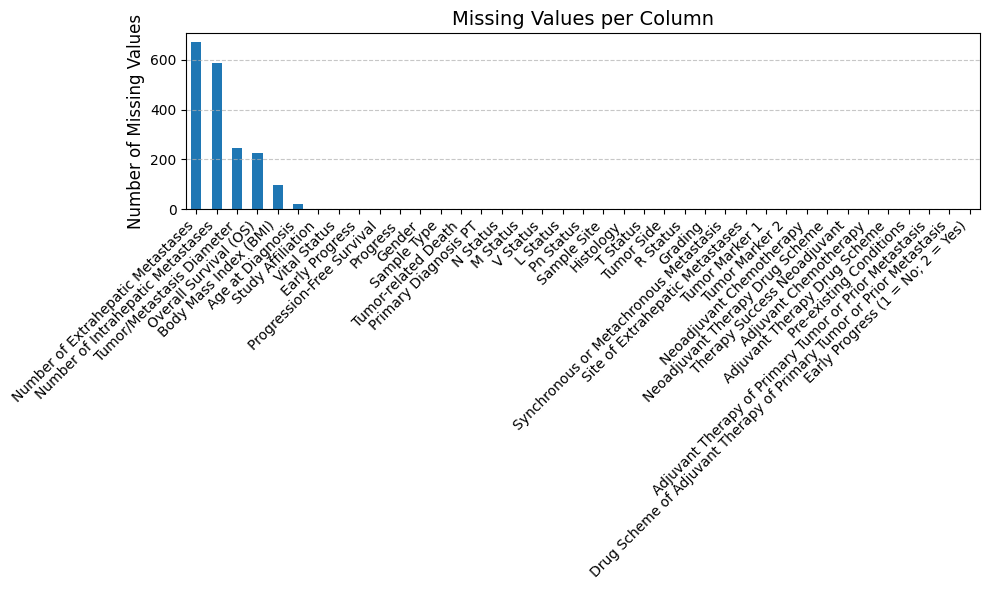

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
nan_values.sort_values(ascending=False).plot(kind='bar')

plt.title("Missing Values per Column", fontsize=14)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7. Handle NaN Values
 - Identify and handle any NaN values in the dataset. Decide whether to fill them with appropriate values (mean, median, or mode) or to drop the rows/columns containing them based on the context.

 - categorical feature --> mode is better

 - continuous/nuerical feature --> median is better


`Tumor/Metastasis Diameter`:

We chose to impute the missing values in the `Tumor/Metastasis Diameter` column using the median value.


In [17]:
# Tumor/Metastasis Diameter
median_value = df["Tumor/Metastasis Diameter"].median()
df["Tumor/Metastasis Diameter"] = df["Tumor/Metastasis Diameter"].fillna(median_value)

`Overall Survival (OS)`:

The missing values in the `Overall Survival (OS)` column were replaced with 0. This approach assumes that missing OS values correspond to cases where survival data was not recorded or not available, and we treat them as having no observed survival duration.





In [18]:
# Overall Survival (OS)
df["Overall Survival (OS)"] = df["Overall Survival (OS)"].fillna(0)

`Number of Extrahepatic Metastases`:

replace missing values with 0


In [19]:
# Number of Extrahepatic Metastases
df["Number of Extrahepatic Metastases"] = df["Number of Extrahepatic Metastases"].fillna(0)

`Number of Intrahepatic Metastases`:

replace missing values with 0

In [20]:
# Number of Intrahepatic Metastases
df["Number of Intrahepatic Metastases"] = df["Number of Intrahepatic Metastases"].fillna(0)

`Body Mass Index (BMI)`:

**assign the median to all the missing values**

In [21]:
# Body Mass Index (BMI)
bmi_median = df["Body Mass Index (BMI)"].median()
df["Body Mass Index (BMI)"] = df["Body Mass Index (BMI)"].fillna(bmi_median)

`Age at Diagnosis`:

**assign the median to all the missing values**


In [22]:
# Age at Diagnosis
age_median = df["Age at Diagnosis"].median()
df["Age at Diagnosis"] = df["Age at Diagnosis"].fillna(age_median)

check to make sure there is no missing values

In [23]:
nan_values_after = df.isnull().sum()
print("Missing values per column:")
print(nan_values_after[nan_values_after > 0])

Missing values per column:
Series([], dtype: int64)


## Data Preprocessing (specific for Phase 3)


- Select relevant genetic features and therapy outcome columns.

 - By looking through all the variables in the spreadsheet, I identified all columns that likely reflect genetic or tumor biological characteristics.

 - The reasons for why don't include all columns in the dataset is because many columns don't reflect the patients' underlying biological or genetic characteristics, such as dates (Geburtsdatum, OP Datum), demographics (Geschlecht, Alter), and clinical outcomes (Nachsorge Datum, Vitalstatus)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 39 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   Study Affiliation                                                     673 non-null    category
 1   Gender                                                                673 non-null    category
 2   Age at Diagnosis                                                      673 non-null    float64 
 3   Progress                                                              673 non-null    category
 4   Progression-Free Survival                                             673 non-null    object  
 5   Early Progress                                                        673 non-null    object  
 6   Vital Status                                                          673 non-null    cate

In [25]:
genetic_columns = ['Tumor Marker 1', 'Tumor Marker 2', 'T Status', 'N Status', 'M Status',
    'V Status', 'L Status', 'Pn Status', 'Grading', 'R Status',
    'Histology', 'Sample Type', 'Sample Site']

therapy_columns = ['Neoadjuvant Therapy Drug Scheme', 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']

- Filter dataset to include rows where at least one therapy column is not null

 - Since our goal of the recommendation system is to learn from existing patient data to suggest appropriate therapies for new patients. If a row in the dataset has missing (null) values for both therapy columns, it means that we have no info about what treatment was given to that patient. Including such rows would not help the model learn any useful relationship between genetic features and therapy choices, and could introduce noise.

In [26]:
df_multi_target_ext = df[genetic_columns + therapy_columns].dropna(subset=therapy_columns, how='all')


- Encode categorical variables (e.g., therapies, biomarkers).


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df_encoded_ext = df_multi_target_ext.copy()
encoders_ext = {}

for col in genetic_columns + therapy_columns:
    le = LabelEncoder()
    df_encoded_ext[col] = le.fit_transform(df_encoded_ext[col].astype(str))
    encoders_ext[col] = le

In [28]:
X_ext = df_encoded_ext[genetic_columns].values
Y_ext = df_encoded_ext[therapy_columns].values

- Encoding New Patients

  - convert a new patient’s genetic profile from text into a numeric vector so that it can be used in similarity computations or machine learning models

In [29]:
def encode_new_patient(new_patient, genetic_columns, encoders):
    encoded_vector = []
    for col in genetic_columns:
        val = new_patient[col]
        encoded_val = encoders[col].transform([val])[0] if val in encoders[col].classes_ else 0
        encoded_vector.append(encoded_val)
    return np.array(encoded_vector)

## Similarity Analysis

- Calculate pairwise genetic similarity between patients

 - choose to use **cosine similarity** rather than Euclidean

   - we don't need to consider normalizing or scaling genetic features for cosine similarity

   - cosine similarity is based on direction, not magnitude


In [30]:
# Define function to compute top-k similar patients
def compute_similarity(new_vector, X_data, top_k=5):
    sim_scores = cosine_similarity([new_vector], X_data)[0]
    top_k_indices = np.argsort(sim_scores)[-top_k:]
    top_k_scores = sim_scores[top_k_indices]
    return top_k_indices, top_k_scores

## Therapy Recommendation

For a new patient’s genetic profile:

- Find most similar patients from the dataset.

- Recommend therapy options that worked well for them

 - frequency-based: Selects the therapy that occurs most often in top-k patients

In [31]:
# Recommend therapies from top-k similar patients
def recommend_therapy(top_k_indices, Y_data, therapy_columns, encoders):
    recommendations = {}
    for i, col in enumerate(therapy_columns):
        top_therapies = Y_data[top_k_indices, i]
        most_common = np.bincount(top_therapies).argmax()
        recommendations[col] = encoders[col].inverse_transform([most_common])[0]
    return recommendations

## Visualization

- A value of 1.0 means a perfect match.

- A value close to 0 means no similarity in genetic feature vector direction.

In [32]:
# Visualize top-k similarities
def plot_similarity(top_k_indices, top_k_scores):
    plt.figure(figsize=(8, 4))
    patients = [f"Patient {i}" for i in top_k_indices]
    plt.barh(patients, top_k_scores, color='skyblue')
    plt.xlabel("Cosine Similarity")
    plt.title("Top-K Genetically Similar Patients")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## Synthetic Examples

### Example 1

In [33]:
# Example 1
example_patient = {
    'Tumor Marker 1': 'cea im normbereich',
    'Tumor Marker 2': 'ca19-9 im normbereich',
    'T Status': 'pt3',
    'N Status': 'pn1',
    'M Status': 'pm0',
    'V Status': 'v0',
    'L Status': 'l1',
    'Pn Status': 'pn1',
    'Grading': 'g2',
    'R Status': 'r0',
    'Histology': 'adenokarzinom',
    'Sample Type': 'primärtumor',
    'Sample Site': 'pankreas'
}

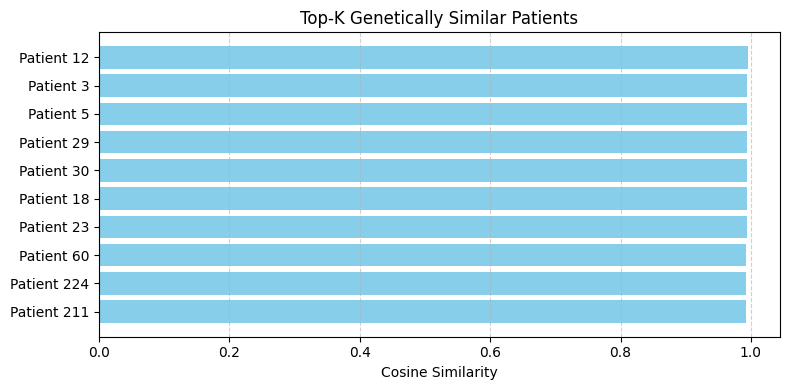

{'Neoadjuvant Therapy Drug Scheme': 'entfällt',
 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis': 'entfällt'}

In [34]:
# Run the full pipeline
encoded_vector1 = encode_new_patient(example_patient, genetic_columns, encoders_ext)
top_k_indices1, top_k_scores1 = compute_similarity(encoded_vector1, X_ext, top_k=10)
recommendations1 = recommend_therapy(top_k_indices1, Y_ext, therapy_columns, encoders_ext)
plot_similarity(top_k_indices1, top_k_scores1)

recommendations1

Explanation: In this synthetic example, all top-5 patients have a cosine similarity very close to 1.0, meaning their genetic profiles are highly similar.

### Example 2

In [35]:
# Example 2
example_patient2 = {
    'Tumor Marker 1': 'cea pathologisch',
    'Tumor Marker 2': 'ca19-9 pathologisch',
    'T Status': 'pt2',
    'N Status': 'pn0',
    'M Status': 'pm0',
    'V Status': 'v1',
    'L Status': 'l0',
    'Pn Status': 'pn0',
    'Grading': 'g3',
    'R Status': 'r1',
    'Histology': 'duktales adenokarzinom',
    'Sample Type': 'metastase',
    'Sample Site': 'leber'
}

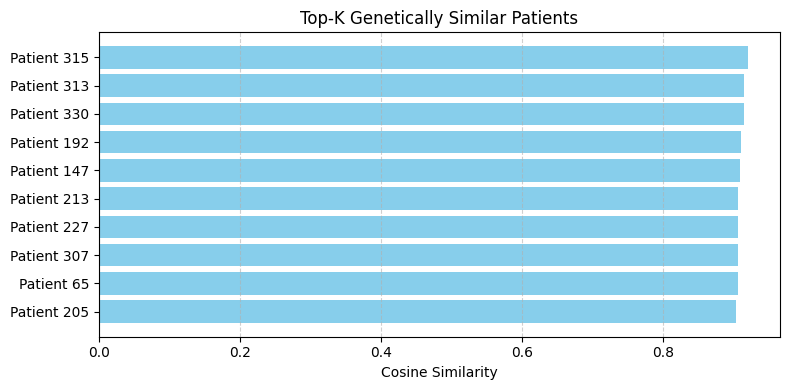

{'Neoadjuvant Therapy Drug Scheme': 'entfällt',
 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis': 'entfällt'}

In [36]:
# Run the full pipeline
encoded_vector2 = encode_new_patient(example_patient2, genetic_columns, encoders_ext)
top_k_indices2, top_k_scores2 = compute_similarity(encoded_vector2, X_ext, top_k=10)
recommendations2 = recommend_therapy(top_k_indices2, Y_ext, therapy_columns, encoders_ext)
plot_similarity(top_k_indices2, top_k_scores2)

recommendations2

## Revised

I choose to use a strict mask to filter out patients whose therapy records are non-informative, such as "entfällt" (not applicable) and "n.r." (not reported).

In [37]:
# Further restrict dataset to rows where at least one therapy column is not "entfällt" or "n.r."
strict_mask = ~((df_multi_target_ext[therapy_columns[0]].isin(['entfällt', 'n.r.'])) &
                (df_multi_target_ext[therapy_columns[1]].isin(['entfällt', 'n.r.'])))
df_multi_target_strict = df_multi_target_ext[strict_mask].copy()

# Re-encode filtered dataset
df_encoded_strict = df_multi_target_strict.copy()
encoders_strict = {}

for col in genetic_columns + therapy_columns:
    le = LabelEncoder()
    df_encoded_strict[col] = le.fit_transform(df_encoded_strict[col].astype(str))
    encoders_strict[col] = le

X_strict = df_encoded_strict[genetic_columns].values
Y_strict = df_encoded_strict[therapy_columns].values

### Example 3

In [38]:
# Example 3
example_patient3 = {
    'Tumor Marker 1': 'cea im normbereich',
    'Tumor Marker 2': 'ca19-9 im normbereich',
    'T Status': 'pt3',
    'N Status': 'pn1',
    'M Status': 'pm0',
    'V Status': 'v0',
    'L Status': 'l1',
    'Pn Status': 'pn1',
    'Grading': 'g2',
    'R Status': 'r0',
    'Histology': 'adenokarzinom',
    'Sample Type': 'primärtumor',
    'Sample Site': 'pankreas'
}

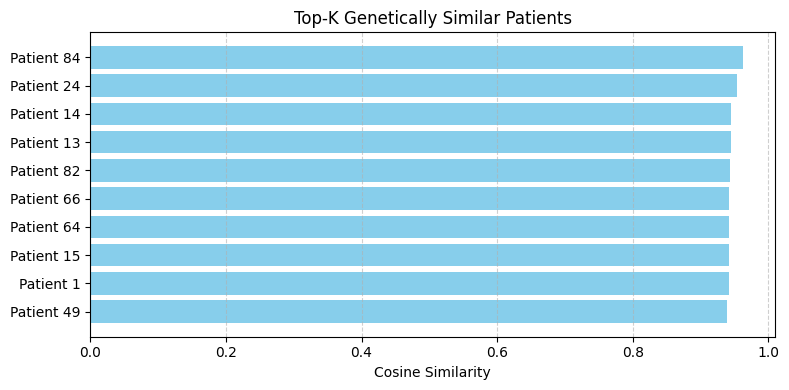

{'Neoadjuvant Therapy Drug Scheme': 'n.r.',
 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis': 'folfox'}

In [39]:
# Run the full pipeline
encoded_vector3 = encode_new_patient(example_patient3, genetic_columns, encoders_strict)
top_k_indices3, top_k_scores3 = compute_similarity(encoded_vector3, X_strict, top_k=10)
recommendations3 = recommend_therapy(top_k_indices3, Y_strict, therapy_columns, encoders_strict)
plot_similarity(top_k_indices3, top_k_scores3)

recommendations3